In [1]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud
from collections import Counter

In [2]:
livros_2020_1sem = pd.read_excel("1 sem 2020 livros PNL finalissima.xls")
livros_2020_2sem = pd.read_excel("livros PNL 2. sem 2020 versáo final .xlsx")
livros_2019_1sem = pd.read_excel("2019 - 1º semestre _ Final.xls")
livros_2019_2sem = pd.read_excel("2019 - 2.ºsem. Finalissíma.xls")
livros_2018_1sem = pd.read_excel("2018 PNL2027 1ºsemestre 2018 ( Sem editoras).xls")
livros_2018_2sem = pd.read_excel("2018-_2.º_semestre .xls")
livros_pre_2017 = pd.read_excel("2017 CONVERSÃO Listas PNL ATÈ 2017 VFINAL ( editoras).xlsx")

In [1]:
#uniformizar 2019 e 2020

header_row = 0
livros_2020_2sem.columns = livros_2020_2sem.iloc[header_row]
livros_2020_2sem = livros_2020_2sem.drop(header_row)
livros_2020_1sem = livros_2020_1sem.drop(columns="Justificação:")
livros_2020_2sem.columns = livros_2020_1sem.columns

livros_2019_2sem.columns = livros_2019_1sem.columns

livros_2020 = pd.concat([livros_2020_1sem, livros_2020_2sem])
livros_2019 = pd.concat([livros_2019_1sem, livros_2019_2sem])

livros_2019 = livros_2019.drop(columns=["Observações:", "Sinopse:"])
livros_2019["Ano PNL"] = "2019"
livros_2020 = livros_2020.drop(columns=["Observações:", "Sinopse:"])
livros_2020["Ano PNL"] = "2020"



NameError: name 'livros_2020_2sem' is not defined

In [4]:
#uniformizar 2018

livros_2018_2sem = livros_2018_2sem.loc[livros_2018_2sem["Apreciação:"] != "Livro excluído"]
livros_2018_2sem = livros_2018_2sem.drop(columns=["Apreciação:", "Observações:", "Sinopse:"])
livros_2018_1sem.columns = livros_2018_2sem.columns
livros_2018 = pd.concat([livros_2018_1sem, livros_2018_2sem])
livros_2018 = livros_2018.drop([0])
livros_2018 = livros_2018.rename(columns={"Ano de edição:": "Data de edição:"})
livros_2018["Ano PNL"] = "2018"

In [5]:
livros_pos_2017 = pd.concat([livros_2018, livros_2019, livros_2020])
livros_2020

,ISBN:,Título:,Autor(es):,Ilustrador(es):,Tradutor(es),Editora:,Data de edição:,Palavras-chave:,Idade:,Nível de Leitura:,Tema:,Formato:,Língua:,Ano PNL
0,9789896796860,Botanicum,"Willis, K.","Scott, K.",n. d.,Edicare,2019,Vida; Árvore; Plantas,9-11 anos;12-14 anos;15-18 anos;,Leitura fluente;Leitura mediana;,Ciência e Tecnologia;Vida Prática;,Livro,Português,2020
1,9789898183248,Diário de um Rio Apaixonado,"Sousa, M.","Marcelo, P.",n. a.,Município Santa Maria da Feira,2019,Rio; Uíma; Terra,9-11 anos;12-14 anos;,Leitura fluente;Leitura mediana;,Ciência e Tecnologia;Literatura;,Livro,Português,2020
2,9789896797256,Um Herói no Meu Nariz,"Sisteré, M.","Sisteré, M.","Florindo, C.",Edicare,2019,Nariz; Ranho; Espirro,9-11 anos;6-8 anos;,Leitura mediana;Leitura inicial;,Ciência e Tecnologia;Vida Prática;,Livro,Português,2020
3,9789898892447,Origens,"Tyson, N, e Goldsmith, D.",NaN,"Guerra, P.",Desassossego,2019,Universo; Antimatéria; Galáxias,15-18 anos;Maiores de 18 anos;,Leitura fluente;,Ciência e Tecnologia;,Livro,Português,2020
4,9789897544088,A Origem de (Quase) Tudo,New Scientist;,Shutterstock,"Pereira, F.",Editorial Presença,2019,Universo; Matéria; Conhecimento,15-18 anos;Maiores de 18 anos;,Leitura fluente;,Ciência e Tecnologia;,Livro,Português,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,978-972-25-3934-0,A Menina com os Olhos Ocupados,André Carrilho,André Carrilho,n.a,Bertrand Editora,2020,"telemóveis, comunicação, família",9-11 anos;12-14 anos;,Leitura fluente;,Literatura;Vida Prática;,Livro,Português,2020
253,978-989-8688-58-3,A gata e a fábula,"Botelho, Fernanda",Sem ilustração,Sem radudor,Abysmo,2018,Insubmissão; conformismo; liberdade,Maiores de 18 anos;15-18 anos;,Leitura fluente;,Literatura;,Livro,Português,2020
254,978-989-783-017-4,NaN,"Handke, Peter",Sem ilustrador,"Lopes, Alexandra",Relógio D'Água,2020,felicidade; Beleza; Reflexão,Maiores de 18 anos;15-18 anos;,Leitura fluente;,Literatura,Livro,Português,2020
255,978-989-722-709-7,O Que É Amar um País,José Tolentino Mendonça,n.a,n.a,Quetzal,2020,"esperança, reflexão, vida",Maiores de 18 anos;15-18 anos;,Leitura fluente;,Ensaio;Vida Prática;,Livro,Português,2020


In [6]:
# correcções manuais de editoras

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Tinta-da-China', "Editora:"] = 'Tinta da China'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Tonta da China', "Editora:"] = 'Tinta da China'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Temas e debates', "Editora:"] = 'Temas e Debates'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Temas & Debates', "Editora:"] = 'Temas e Debates'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Círculo de Leitores/Temas e Debates', "Editora:"] = 'Temas e Debates'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Saída de Emergencia', "Editora:"] = 'Saída de Emergência'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Saída de emergência', "Editora:"] = 'Saída de Emergência'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Edições Saída de Emergência', "Editora:"] = 'Saída de Emergência'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Relogio D\' Água', "Editora:"] = "Relógio D'Água"
livros_pos_2017.loc[livros_pos_2017["Editora:"] == "Relógio D' Água ", "Editora:"] = "Relógio D'Água"
livros_pos_2017.loc[livros_pos_2017["Editora:"] == "Relógio D' Água", "Editora:"] = "Relógio D'Água"
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Relógio D\' Água Editores', "Editora:"] = "Relógio D'Água"
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Relógio D\´Água', "Editora:"] = "Relógio D'Água"
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Relógio D’ Água Editores', "Editora:"] = "Relógio D'Água"
livros_pos_2017.loc[livros_pos_2017["Editora:"] == "Relogio D'Água", "Editora:"] = "Relógio D'Água"
livros_pos_2017.loc[livros_pos_2017["Editora:"] == "Relógio d'Àgua", "Editora:"] = "Relógio D'Água"
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Relógio d`Água', "Editora:"] = "Relógio D'Água"
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Relógio d´´Agua', "Editora:"] = "Relógio D'Água"
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Relógio d’Água', "Editora:"] = "Relógio D'Água"

livros_pos_2017.loc[livros_pos_2017["Editora:"] == "Relógio D'Água", "Editora:"] = "Relógio D'Água"
livros_pos_2017.loc[livros_pos_2017["Editora:"] == "Relógio D'Água Editores", "Editora:"] = "Relógio D'Água"
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Relógio D’Água', "Editora:"] = "Relógio D'Água"
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Relógio D´Água', "Editora:"] = "Relógio D'Água"
livros_pos_2017.loc[livros_pos_2017["Editora:"] == "Relógio d'Água", "Editora:"] = "Relógio D'Água"
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Relogio D’Água', "Editora:"] = "Relógio D'Água"

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Porto Editora ', "Editora:"] = 'Porto Editora'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Porto Editra', "Editora:"] = 'Porto Editora'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Porto editora', "Editora:"] = 'Porto Editora'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Quetzal', "Editora:"] = 'Quetzal Editores'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'CASA DAS LETRAS', "Editora:"] = 'Casa das Letras'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'casa das letras', "Editora:"] = 'Casa das Letras'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'EMEL - Empresa Municipal de Mobilidade e Estacionamento de Lisboa, E. M.. S. A.', "Editora:"] = 'EMEL - Empresa Municipal de Mobilidade e Estacionamento de Lisboa, E.M., S.A.'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Guerra e Paz', "Editora:"] = 'Guerra & Paz'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Guerra e Paz Editores', "Editora:"] = 'Guerra & Paz'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Guerra &Paz', "Editora:"] = 'Guerra & Paz'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Guerra&Paz', "Editora:"] = 'Guerra & Paz'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Guerra e Paz, Editores', "Editora:"] = 'Guerra & Paz'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Guerra e Paz, editores', "Editora:"] = 'Guerra & Paz'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Guerra & Paz, editores', "Editora:"] = 'Guerra & Paz'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Edições Guerra e Paz', "Editora:"] = 'Guerra & Paz'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Editora Guerra e Paz', "Editora:"] = 'Guerra & Paz'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Editora Guerra & Paz', "Editora:"] = 'Guerra & Paz'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Leya-livros RTP', "Editora:"] = 'Leya/RTP'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Leya/Livros RTP', "Editora:"] = 'Leya/RTP'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Leya/ Livros RTP', "Editora:"] = 'Leya/RTP'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Leya/ Livros RTP', "Editora:"] = 'Leya/RTP'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == '20|20 editora  Booksmile', "Editora:"] = 'Booksmile'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Booksmile.', "Editora:"] = 'Booksmile'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == '20/20 Editora Booksmile', "Editora:"] = 'Booksmile'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Booksmille', "Editora:"] = 'Booksmile'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == ' Editora Booksmile', "Editora:"] = 'Booksmile'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'cavalo de ferro', "Editora:"] = 'Cavalo de Ferro'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'lilliput', "Editora:"] = 'Lilliput'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Companha das Letras', "Editora:"] = 'Companhia das Letras'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Companhia das letras', "Editora:"] = 'Companhia das Letras'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Publicações Sibíla', "Editora:"] = 'Sibila Publicações'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Abymo', "Editora:"] = 'Abysmo'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Chiado', "Editora:"] = 'Chiado Editora'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Ed.70', "Editora:"] = 'Edições 70'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Livros Horizontes', "Editora:"] = 'Livros Horizonte'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Livros horizonte', "Editora:"] = 'Livros Horizonte'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Marcardor editora', "Editora:"] = 'Marcador'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == "Arte D'Autor", "Editora:"] = 'Arte de Autor'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Editorial Bizâncio', "Editora:"] = 'Editorial Bizâncio'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'ASA II, S.A.', "Editora:"] = 'ASA'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Edições ASA II, S.A.', "Editora:"] = 'ASA'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Asa', "Editora:"] = 'ASA'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Edições Asa', "Editora:"] = 'ASA'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Ed.Asa II', "Editora:"] = 'ASA'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'www.poetsandragons.com', "Editora:"] = 'The Poets and Dragons Society'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'The poets and dragons society', "Editora:"] = 'The Poets and Dragons Society'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'D.Quixote', "Editora:"] = 'D. Quixote'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Dom Quixote', "Editora:"] = 'D. Quixote'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Assírio e Alvim', "Editora:"] = 'Assírio & Alvim'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Nuvem de Letras - Penguin Random House', "Editora:"] = 'Nuvem de Letras'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Alfaguara Portugal', "Editora:"] = 'Alfaguara'  

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Bertrand Editora ', "Editora:"] = 'Bertrand Editora'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Bertrand editora', "Editora:"] = 'Bertrand Editora'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Bertrand Editores', "Editora:"] = 'Bertrand Editora'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Bertrand', "Editora:"] = 'Bertrand Editora'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Edições Contraponto', "Editora:"] = 'Contraponto Editores'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Contraponto editores', "Editora:"] = 'Contraponto Editores'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Contraponto', "Editora:"] = 'Contraponto Editores'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Sextante Editora (chancela)', "Editora:"] = 'Sextante Editora'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Bruaá', "Editora:"] = 'Bruaá Editora'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Gradiva Publicações, S. A.', "Editora:"] = 'Gradiva'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Texto Editora', "Editora:"] = 'Texto Editores'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Planeta', "Editora:"] = 'Editorial Planeta'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Leya-Caminho', "Editora:"] = 'Caminho'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Leya/Caminho', "Editora:"] = 'Caminho'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Editorial Caminho', "Editora:"] = 'Caminho'  

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Âncora', "Editora:"] = 'Âncora Editora'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'âncora', "Editora:"] = 'Âncora Editora'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Âncora Editores', "Editora:"] = 'Âncora Editora'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Kalandraka Editora', "Editora:"] = 'Kalandraka'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'kalandraka', "Editora:"] = 'Kalandraka'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'INCM', "Editora:"] = 'Imprensa Nacional-Casa da Moeda'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'INCM – Imprensa Nacional Casa da Moeda', "Editora:"] = 'Imprensa Nacional-Casa da Moeda'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Imprensa Nacional', "Editora:"] = 'Imprensa Nacional-Casa da Moeda'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Imprensa Nacional - Casa da Moeda', "Editora:"] = 'Imprensa Nacional-Casa da Moeda'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Imprensa Nacional-Casa da moeda', "Editora:"] = 'Imprensa Nacional-Casa da Moeda'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'PIM Edições', "Editora:"] = 'PIM! Edições'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Pato Lógico Edições', "Editora:"] = 'Pato Lógico'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Pato Lógico e INCM', "Editora:"] = 'Pato Lógico'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Pato Lógico / INCM', "Editora:"] = 'Pato Lógico'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Imprensa Nacional-Casa da Moeda / Pato Lógico', "Editora:"] = 'Pato Lógico'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Imprensa Nacional/Pato Lógico', "Editora:"] = 'Pato Lógico'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Edições betweien', "Editora:"] = 'Betweien edições'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Betweien, Lda.', "Editora:"] = 'Betweien edições'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Editorial Bizâncio', "Editora:"] = 'Bizâncio'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'E-primatur', "Editora:"] = 'E-Primatur'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'E-Primatur/Letras Errantes', "Editora:"] = 'E-Primatur'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Book Builders', "Editora:"] = 'BookBuilders'

livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Letras Lavadas edições', "Editora:"] = 'Letras Lavadas'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Canto das Cores - Edições', "Editora:"] = 'Canto das Cores'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Edições zero a oito', "Editora:"] = 'Zero a Oito'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Zero a oito', "Editora:"] = 'Zero a Oito'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'TopSeller', "Editora:"] = 'Topseller'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'coolbooks', "Editora:"] = 'Coolbooks'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Cultura', "Editora:"] = 'Cultura Editora'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Sulfuria Edições', "Editora:"] = 'Sulfúria Edições'
livros_pos_2017.loc[livros_pos_2017["Editora:"] == 'Xerefé Edições', "Editora:"] = 'Xerefé Editora'

In [7]:
livros_pos_2017.to_csv("livros pos 2017.csv")

In [8]:
'''editora_2020 = livros_pos_2017.loc[(livros_pos_2017["Editora:"] == "Booksmile") | (livros_pos_2017["Editora:"] == "Cavalo de Ferro") | (livros_pos_2017["Editora:"] == "Elsinore") | (livros_pos_2017["Editora:"] == "Lilliput") | (livros_pos_2017["Editora:"] == "Topseller") | (livros_pos_2017["Editora:"] == "Fábula") ]
#editora_2020.to_csv("fatia_2020.csv")
editora_2020["Editora:"].value_counts()'''

'editora_2020 = livros_pos_2017.loc[(livros_pos_2017["Editora:"] == "Booksmile") | (livros_pos_2017["Editora:"] == "Cavalo de Ferro") | (livros_pos_2017["Editora:"] == "Elsinore") | (livros_pos_2017["Editora:"] == "Lilliput") | (livros_pos_2017["Editora:"] == "Topseller") | (livros_pos_2017["Editora:"] == "Fábula") ]\n#editora_2020.to_csv("fatia_2020.csv")\neditora_2020["Editora:"].value_counts()'

## Nuvens de Palavras

In [9]:
def limpar_texto(serie_pandas):
    novo_texto = re.sub(r'[^\w\s]', ' ', serie_pandas).lower()
    novo_texto = re.sub(r'[\n]','', novo_texto).lower()
    return novo_texto

wordcloud_df = livros_pos_2017
wordcloud_df = wordcloud_df.drop(wordcloud_df[(wordcloud_df["Palavras-chave:"] == "não se aplica") | (wordcloud_df["Palavras-chave:"] == "x") | (wordcloud_df["Palavras-chave:"] == "   ") | (wordcloud_df["Palavras-chave:"] == "n a ") | (wordcloud_df["Palavras-chave:"] == "nan") ].index)
wordcloud_df["Palavras-chave:"] = wordcloud_df["Palavras-chave:"].apply(str)
wordcloud_df["Palavras-chave:"] = wordcloud_df["Palavras-chave:"].apply(limpar_texto)

palavras_2018 = wordcloud_df[wordcloud_df["Ano PNL"] == "2018"]
palavras_2019 = wordcloud_df[wordcloud_df["Ano PNL"] == "2019"]
palavras_2020 = wordcloud_df[wordcloud_df["Ano PNL"] == "2020"]

c = Counter()

word_count = Counter(" ".join(wordcloud_df["Palavras-chave:"].values.tolist()).split(" ")).items()
word_count = pd.DataFrame(word_count)
word_count = word_count.rename(columns={0: "Palavra", 1: "Frequência"})
word_count.to_csv("frequencia_palavras_chave_pos_2017.csv")

<ipython-input-9-e3be4891ad52>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordcloud_df["Palavras-chave:"] = wordcloud_df["Palavras-chave:"].apply(str)
<ipython-input-9-e3be4891ad52>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordcloud_df["Palavras-chave:"] = wordcloud_df["Palavras-chave:"].apply(limpar_texto)


In [10]:
# Join the different processed titles together.
long_string_2018 = ' '.join(list(palavras_2018["Palavras-chave:"].values))
long_string_2019 = ' '.join(list(palavras_2019["Palavras-chave:"].values))
long_string_2020 = ' '.join(list(palavras_2020["Palavras-chave:"].values))


myText = open(r'text_long_string.txt','w')
myString = long_string_2018
myText.write(myString)
myText.close()


Palavras 2018


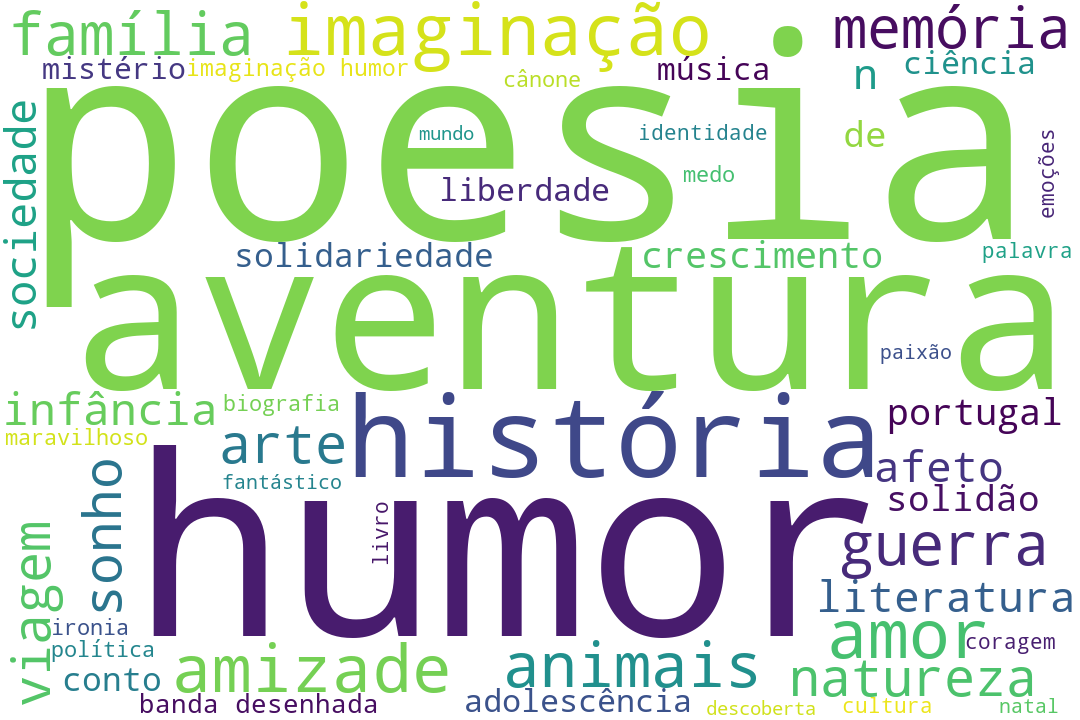

In [11]:
# Create a WordCloud object
#https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

wordcloud = WordCloud(background_color="white", width=1080, height=720, max_words=50)

# Generate a word cloud

# Visualize the word cloud
print("Palavras 2018")
wordcloud.generate(long_string_2018)
#wordcloud.to_file("nuvem-ricardo-reis.png")
wordcloud.to_image()

Palavras 2019


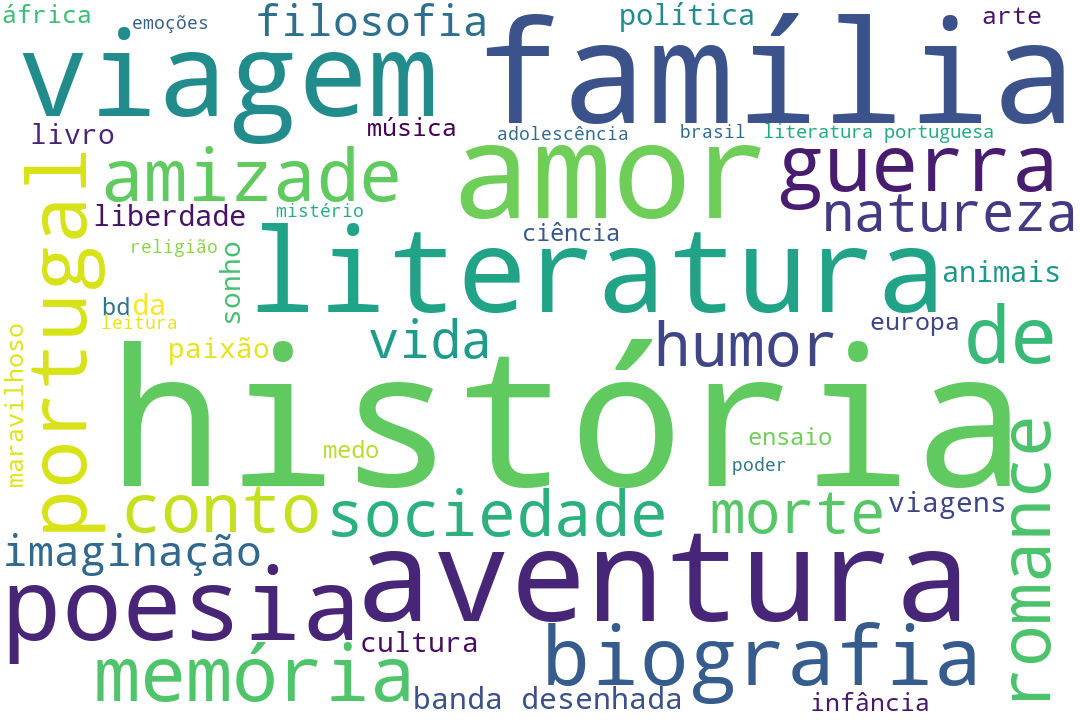

In [12]:
# Visualize the word cloud
print("Palavras 2019")
wordcloud.generate(long_string_2019)
#wordcloud.to_file("nuvem-ricardo-reis.png")
wordcloud.to_image()

Palavras 2020


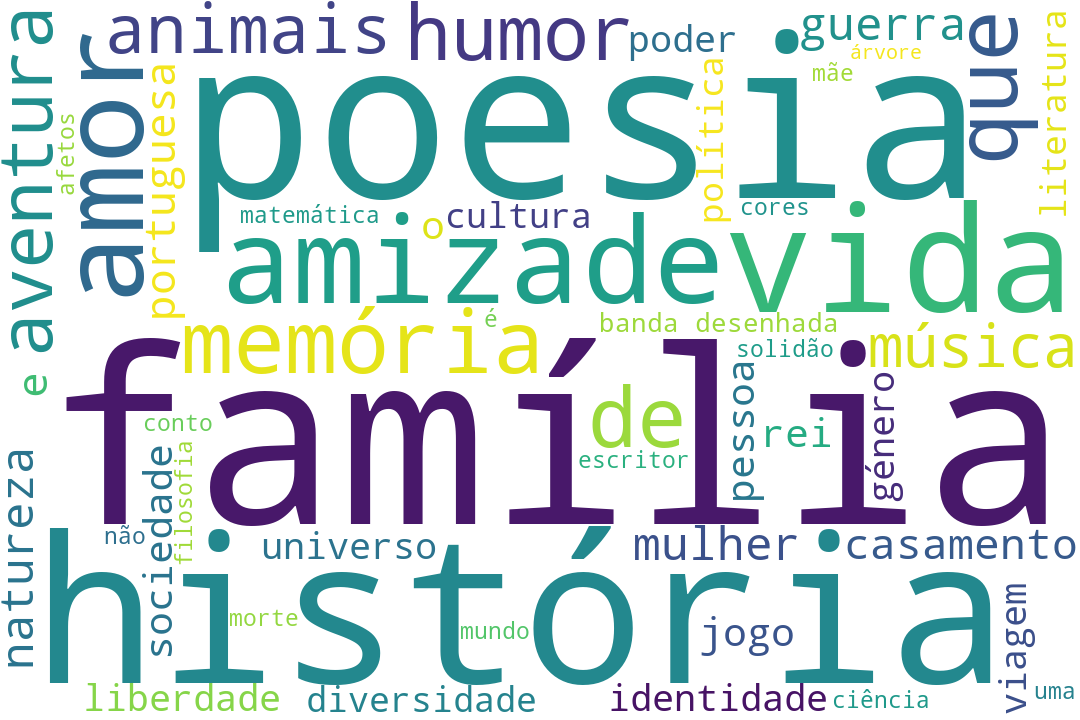

In [13]:
# Visualize the word cloud
print("Palavras 2020")
wordcloud.generate(long_string_2020)
#wordcloud.to_file("nuvem-ricardo-reis.png")
wordcloud.to_image()

In [14]:
editoras_pos_2017 = livros_pos_2017.groupby(["Editora:", "Ano PNL"])["Título:"].count()
editoras_pos_2017 = pd.DataFrame(editoras_pos_2017)
editoras_pos_2017 = editoras_pos_2017.reset_index()




In [15]:
editoras_pivot = editoras_pos_2017.pivot(index="Editora:", columns=["Ano PNL"])
editoras_pivot["Grupo editorial"] = np.nan
editoras_pivot = editoras_pivot.reset_index()
#editoras_pivot.to_csv("OLD-editoras pos 2017.csv")

In [16]:
'''editoras_pos_2017 = pd.read_csv("editoras pos 2017.csv")
editoras_pos_2017 = editoras_pos_2017.fillna(0)
editoras_pos_2017 = editoras_pos_2017.drop(columns="Unnamed: 0")
editoras_pos_2017["Total"] = editoras_pos_2017["2018"] + editoras_pos_2017["2019"] + editoras_pos_2017["2020"]
editoras_pos_2017 = editoras_pos_2017.astype(int, errors="ignore")
editoras_pos_2017.loc[editoras_pos_2017['Grupo editorial'] == '0', "Grupo editorial"] = 'Independentes'
editoras_pos_2017.to_csv("editoras pos 2017.csv")
editoras_pos_2017'''

'editoras_pos_2017 = pd.read_csv("editoras pos 2017.csv")\neditoras_pos_2017 = editoras_pos_2017.fillna(0)\neditoras_pos_2017 = editoras_pos_2017.drop(columns="Unnamed: 0")\neditoras_pos_2017["Total"] = editoras_pos_2017["2018"] + editoras_pos_2017["2019"] + editoras_pos_2017["2020"]\neditoras_pos_2017 = editoras_pos_2017.astype(int, errors="ignore")\neditoras_pos_2017.loc[editoras_pos_2017[\'Grupo editorial\'] == \'0\', "Grupo editorial"] = \'Independentes\'\neditoras_pos_2017.to_csv("editoras pos 2017.csv")\neditoras_pos_2017'

In [17]:
#livros_pre_2017 = livros_pre_2017.drop_duplicates (subset=['Título', 'Autor'], keep='first')

In [18]:
#correcção manual de temas

livros_pre_2017.loc[livros_pre_2017['Temas01'] == 'Ciências & tecnologia', "Temas01"] = 'Ciências e Tecnologia'
livros_pre_2017.loc[livros_pre_2017['Temas01'] == 'Ciências & Tecnologia', "Temas01"] = 'Ciências e Tecnologia'
livros_pre_2017.loc[livros_pre_2017['Temas01'] == 'Ciências e Tecnologia', "Temas01"] = 'Ciências e Tecnologia'
livros_pre_2017.loc[livros_pre_2017['Temas01'] == 'Poesa', "Temas01"] = 'Poesia'
livros_pre_2017.loc[livros_pre_2017['Temas01'] == 'Vida prática', "Temas01"] = 'Vida Prática'
livros_pre_2017.loc[livros_pre_2017['Temas01'] == 'Biografias', "Temas01"] = 'Biografia'

In [19]:
idade_tema_2017 = livros_pre_2017.groupby(["Idade02","Temas01"])["Título"].count()
#idade_tema_2017.to_csv("idade_tema_2017.csv")
idade_tema_2017

Idade02             Temas01              
0-2 anos            Artes                      17
                    Ciências e Tecnologia      47
                    Cultura e Sociedade        10
                    Literatura                 75
                    Vida Prática               29
12-14 anos          Artes                      13
                    Biografia                   4
                    Ciências e Tecnologia     174
                    Cultura e Sociedade       130
                    Ensaio                      2
                    Literatura                610
                    Poesia                     26
12-14 anos          Literatura                  1
15-18 anos          Artes                       6
                    Biografia                  10
                    Ciências e Tecnologia      13
                    Cultura e Sociedade       223
                    Ensaio                      5
                    Literatura                689
        

In [20]:
evolucao_editoras_pre_2017 = livros_pre_2017.groupby(["Editora", "Data de edição"])["Título"].count()
evolucao_editoras_pre_2017.to_csv("evolução editoras pré 2017.csv")

In [21]:
livros_pre_2017.columns

Index(['ISBN', 'Título', 'Autor', 'Ilustrador', 'Tradutor', 'Data de edição',
       'Editora', 'Idade02', 'Idade02.1', 'Nível de leitura01',
       'Nível de leitura02', 'Temas01', 'Temas02', 'Temas03', 'Formato01',
       'Formato02', 'Línguas01', 'Línguas02'],
      dtype='object')

In [22]:
livros_pre_2017.dtypes

ISBN                  object
Título                object
Autor                 object
Ilustrador            object
Tradutor              object
Data de edição        object
Editora               object
Idade02               object
Idade02.1             object
Nível de leitura01    object
Nível de leitura02    object
Temas01               object
Temas02               object
Temas03               object
Formato01             object
Formato02             object
Línguas01             object
Línguas02             object
dtype: object

In [23]:
# correcções manuais de editoras

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Tinta-da-China', "Editora"] = 'Tinta da China'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Tonta da China', "Editora"] = 'Tinta da China'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Temas e debates', "Editora"] = 'Temas e Debates'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Temas & Debates', "Editora"] = 'Temas e Debates'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Círculo de Leitores/Temas e Debates', "Editora"] = 'Temas e Debates'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Saída de Emergencia', "Editora"] = 'Saída de Emergência'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Saída de emergência', "Editora"] = 'Saída de Emergência'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Edições Saída de Emergência', "Editora"] = 'Saída de Emergência'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Relogio D\' Água', "Editora"] = "Relógio D'Água"
livros_pre_2017.loc[livros_pre_2017["Editora"] == "Relógio D' Água ", "Editora"] = "Relógio D'Água"
livros_pre_2017.loc[livros_pre_2017["Editora"] == "Relógio D' Água", "Editora"] = "Relógio D'Água"
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Relógio D\' Água Editores', "Editora"] = "Relógio D'Água"
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Relógio D\´Água', "Editora"] = "Relógio D'Água"
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Relógio D’ Água Editores', "Editora"] = "Relógio D'Água"
livros_pre_2017.loc[livros_pre_2017["Editora"] == "Relogio D'Água", "Editora"] = "Relógio D'Água"
livros_pre_2017.loc[livros_pre_2017["Editora"] == "Relógio d'Àgua", "Editora"] = "Relógio D'Água"
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Relógio d`Água', "Editora"] = "Relógio D'Água"
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Relógio d´´Agua', "Editora"] = "Relógio D'Água"
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Relógio d’Água', "Editora"] = "Relógio D'Água"

livros_pre_2017.loc[livros_pre_2017["Editora"] == "Relógio D'Água", "Editora"] = "Relógio D'Água"
livros_pre_2017.loc[livros_pre_2017["Editora"] == "Relógio D'Água Editores", "Editora"] = "Relógio D'Água"
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Relógio D’Água', "Editora"] = "Relógio D'Água"
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Relógio D´Água', "Editora"] = "Relógio D'Água"
livros_pre_2017.loc[livros_pre_2017["Editora"] == "Relógio d'Água", "Editora"] = "Relógio D'Água"
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Relogio D’Água', "Editora"] = "Relógio D'Água"

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Porto Editora ', "Editora"] = 'Porto Editora'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Porto Editra', "Editora"] = 'Porto Editora'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Porto editora', "Editora"] = 'Porto Editora'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Quetzal', "Editora"] = 'Quetzal Editores'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'CASA DAS LETRAS', "Editora"] = 'Casa das Letras'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'casa das letras', "Editora"] = 'Casa das Letras'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'EMEL - Empresa Municipal de Mobilidade e Estacionamento de Lisboa, E. M.. S. A.', "Editora"] = 'EMEL - Empresa Municipal de Mobilidade e Estacionamento de Lisboa, E.M., S.A.'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Guerra e Paz', "Editora"] = 'Guerra & Paz'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Guerra e Paz Editores', "Editora"] = 'Guerra & Paz'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Guerra &Paz', "Editora"] = 'Guerra & Paz'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Guerra&Paz', "Editora"] = 'Guerra & Paz'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Guerra e Paz, Editores', "Editora"] = 'Guerra & Paz'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Guerra e Paz, editores', "Editora"] = 'Guerra & Paz'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Guerra & Paz, editores', "Editora"] = 'Guerra & Paz'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Edições Guerra e Paz', "Editora"] = 'Guerra & Paz'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Editora Guerra e Paz', "Editora"] = 'Guerra & Paz'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Editora Guerra & Paz', "Editora"] = 'Guerra & Paz'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Leya-livros RTP', "Editora"] = 'Leya/RTP'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Leya/Livros RTP', "Editora"] = 'Leya/RTP'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Leya/ Livros RTP', "Editora"] = 'Leya/RTP'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Leya/ Livros RTP', "Editora"] = 'Leya/RTP'

livros_pre_2017.loc[livros_pre_2017["Editora"] == '20|20 editora  Booksmile', "Editora"] = 'Booksmile'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Booksmile.', "Editora"] = 'Booksmile'
livros_pre_2017.loc[livros_pre_2017["Editora"] == '20/20 Editora Booksmile', "Editora"] = 'Booksmile'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Booksmille', "Editora"] = 'Booksmile'
livros_pre_2017.loc[livros_pre_2017["Editora"] == ' Editora Booksmile', "Editora"] = 'Booksmile'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'cavalo de ferro', "Editora"] = 'Cavalo de Ferro'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'lilliput', "Editora"] = 'Lilliput'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Companha das Letras', "Editora"] = 'Companhia das Letras'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Companhia das letras', "Editora"] = 'Companhia das Letras'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Publicações Sibíla', "Editora"] = 'Sibila Publicações'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Abymo', "Editora"] = 'Abysmo'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Chiado', "Editora"] = 'Chiado Editora'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Ed.70', "Editora"] = 'Edições 70'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Livros Horizontes', "Editora"] = 'Livros Horizonte'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Livros horizonte', "Editora"] = 'Livros Horizonte'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Marcardor editora', "Editora"] = 'Marcador'
livros_pre_2017.loc[livros_pre_2017["Editora"] == "Arte D'Autor", "Editora"] = 'Arte de Autor'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Editorial Bizâncio', "Editora"] = 'Editorial Bizâncio'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'ASA II, S.A.', "Editora"] = 'ASA'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Edições ASA II, S.A.', "Editora"] = 'ASA'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Asa', "Editora"] = 'ASA'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Edições Asa', "Editora"] = 'ASA'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Ed.Asa II', "Editora"] = 'ASA'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'www.poetsandragons.com', "Editora"] = 'The Poets and Dragons Society'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'The poets and dragons society', "Editora"] = 'The Poets and Dragons Society'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'D.Quixote', "Editora"] = 'D. Quixote'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Dom Quixote', "Editora"] = 'D. Quixote'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Assírio e Alvim', "Editora"] = 'Assírio & Alvim'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Nuvem de Letras - Penguin Random House', "Editora"] = 'Nuvem de Letras'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Alfaguara Portugal', "Editora"] = 'Alfaguara'  

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Bertrand Editora ', "Editora"] = 'Bertrand Editora'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Bertrand editora', "Editora"] = 'Bertrand Editora'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Bertrand Editores', "Editora"] = 'Bertrand Editora'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Bertrand', "Editora"] = 'Bertrand Editora'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Edições Contraponto', "Editora"] = 'Contraponto Editores'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Contraponto editores', "Editora"] = 'Contraponto Editores'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Contraponto', "Editora"] = 'Contraponto Editores'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Sextante Editora (chancela)', "Editora"] = 'Sextante Editora'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Bruaá', "Editora"] = 'Bruaá Editora'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Gradiva Publicações, S. A.', "Editora"] = 'Gradiva'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Texto Editora', "Editora"] = 'Texto Editores'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Planeta', "Editora"] = 'Editorial Planeta'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Leya-Caminho', "Editora"] = 'Caminho'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Leya/Caminho', "Editora"] = 'Caminho'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Editorial Caminho', "Editora"] = 'Caminho'  

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Âncora', "Editora"] = 'Âncora Editora'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'âncora', "Editora"] = 'Âncora Editora'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Âncora Editores', "Editora"] = 'Âncora Editora'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Kalandraka Editora', "Editora"] = 'Kalandraka'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'kalandraka', "Editora"] = 'Kalandraka'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'INCM', "Editora"] = 'Imprensa Nacional-Casa da Moeda'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'INCM – Imprensa Nacional Casa da Moeda', "Editora"] = 'Imprensa Nacional-Casa da Moeda'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Imprensa Nacional', "Editora"] = 'Imprensa Nacional-Casa da Moeda'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Imprensa Nacional - Casa da Moeda', "Editora"] = 'Imprensa Nacional-Casa da Moeda'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Imprensa Nacional-Casa da moeda', "Editora"] = 'Imprensa Nacional-Casa da Moeda'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'PIM Edições', "Editora"] = 'PIM! Edições'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Pato Lógico Edições', "Editora"] = 'Pato Lógico'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Pato Lógico e INCM', "Editora"] = 'Pato Lógico'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Pato Lógico / INCM', "Editora"] = 'Pato Lógico'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Imprensa Nacional-Casa da Moeda / Pato Lógico', "Editora"] = 'Pato Lógico'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Imprensa Nacional/Pato Lógico', "Editora"] = 'Pato Lógico'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Edições betweien', "Editora"] = 'Betweien edições'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Betweien, Lda.', "Editora"] = 'Betweien edições'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Editorial Bizâncio', "Editora"] = 'Bizâncio'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'E-primatur', "Editora"] = 'E-Primatur'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'E-Primatur/Letras Errantes', "Editora"] = 'E-Primatur'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Book Builders', "Editora"] = 'BookBuilders'

livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Letras Lavadas edições', "Editora"] = 'Letras Lavadas'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Canto das Cores - Edições', "Editora"] = 'Canto das Cores'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Edições zero a oito', "Editora"] = 'Zero a Oito'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Zero a oito', "Editora"] = 'Zero a Oito'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'TopSeller', "Editora"] = 'Topseller'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'coolbooks', "Editora"] = 'Coolbooks'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Cultura', "Editora"] = 'Cultura Editora'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Sulfuria Edições', "Editora"] = 'Sulfúria Edições'
livros_pre_2017.loc[livros_pre_2017["Editora"] == 'Xerefé Edições', "Editora"] = 'Xerefé Editora'

In [24]:
livros_pre_2017.dtypes

ISBN                  object
Título                object
Autor                 object
Ilustrador            object
Tradutor              object
Data de edição        object
Editora               object
Idade02               object
Idade02.1             object
Nível de leitura01    object
Nível de leitura02    object
Temas01               object
Temas02               object
Temas03               object
Formato01             object
Formato02             object
Línguas01             object
Línguas02             object
dtype: object

In [25]:
livros_pre_2017.to_csv("livros_pre_2017.csv")